In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from numba import jit
from sklearn import datasets

In [2]:
def f (x,y):      # Функция Матьяса
    return 0.26 * (x*x + y*y) - 0.48*x*y

def gradf (x,y):
    return np.array([(0.52*x - 0.48*y), (-0.48*x + 0.52*y)])

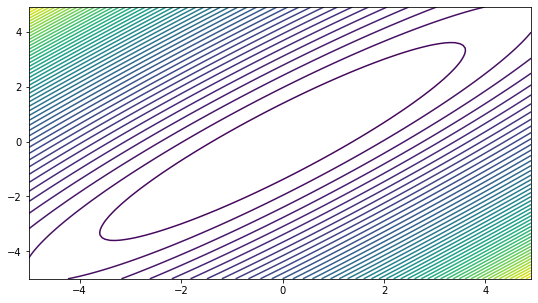

In [3]:
from matplotlib.ticker import MaxNLocator

# Изобразим функцию Химмельблау
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(f(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
    
plt.show()

In [5]:
@jit
def f (x,y):      # Функция Матьяса
    return 0.26 * (x*x + y*y) - 0.48*x*y

@jit
def gradf (x,y):
    return np.array([(0.52*x - 0.48*y), (-0.48*x + 0.52*y)])

In [6]:
@jit
def gd(f, gradf, x0, y0, lr=0.01, lrf=10, k=0.1, km=0.9, kms=0.9, N=300):
    x_old = x0;
    y_old = y0;
    n = np.zeros(gradf(x0,y0).shape)
    for i in range(N):
        if ((i%lrf)==0):
            lr *= k
        n = km*n - lr*gradf(x0+km*n[0], y0+km*n[1])
        x = x_old - lr*n[0]
        y = y_old - lr*n[1]
        
    return x, y, f(x, y)

In [8]:
z, y = datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
for i in range(len(z)):
    x[i],y[i] = z[i];
x, y

(array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
         1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
 array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
        4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]))

In [9]:
result = gd(f, gradf, x, y)
gd_ind = np.argmin(result[2])
result, gd_ind

/run/user/1000/ipykernel_80174/3913631719.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "gd" failed type inference due to: Invalid use of type(CPUDispatcher(<function gradf at 0x7efefa246ee0>)) with parameters (array(float64, 1d, C), array(float64, 1d, C))

During: resolving callee type: type(CPUDispatcher(<function gradf at 0x7efefa246ee0>))
During: typing of call at /run/user/1000/ipykernel_80174/3913631719.py (5)


File "../../../../run/user/1000/ipykernel_80174/3913631719.py", line 5:
<source missing, REPL/exec in use?>

  @jit
/run/user/1000/ipykernel_80174/3913631719.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "gd" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../run/user/1000/ipykernel_80174/3913631719.py", line 6:
<source missing, REPL/exec in use?>

  @jit
/nix/store/7p1mvpcnd95x4a

((array([ 1.12031365, -0.49772229,  1.9263585 ,  2.49913075,  3.54934659,
          1.7373078 ,  2.91970372,  2.84382807,  0.87305123,  2.36833522]),
  array([5.75806083, 1.55128226, 4.15243012, 1.23133799, 0.6925054 ,
         4.42546234, 0.15549864, 3.32650945, 4.71438583, 0.04356792]),
  array([5.85029509, 1.0607048 , 1.60836543, 0.5409886 , 2.22031849,
         2.18634107, 2.00477613, 0.43897598, 4.00115741, 1.40930852])),
 7)